# A Vanilla ML Workflow Peer-Programmed with AI
No doubt you have heard about Generative AI (GenAI). In this session, we study how GenAI, specifically, ChatGPT can help us develop a Python script for analysis data. We consider a data set related to credit risk modeling and use ChatGPT to create codes for taking a first look at the data or, more formally, to engage in explanatory data analysis (EDA). The notebook provides four prompts, which have been tested and should work reasonably well. That said, there is no guarantee that these prompts will lead ChatGPT to output code that is ready to use. As said, one learning goal of this session is to *study how GenAI can help us*. We should not expect it to do all the work ;)

We suggest you begin with the prompts below. Afterwards, you are most welcome to make changes, adjust the prompts, and examine how changes in your prompts change the generated codes; and, by extension, the effectiveness of the GenAI support. Let's move on with the first prompt.

## Prompt 1: Explanatory Data Analysis
Submit the following prompt to ChatGPT. Copy the resulting code into the below code cell and (try to) execute it.

```
You are a data scientist working for a major retail bank. You received a data set of past transactions. Specifically, the data set is available as an MS Excel file hmeq.xlsx. Each row represents one loan application, which is characterized by several attributes (i.e., the columns).
The table includes a binary target variable named "BAD", which indicates whether the credit was repaid (BAD==0) or not (BAD==1). Furthermore, the data set includes the following attributes:
- LOAN: amount of the loan request
- MORTDUE: amount due on an existing mortgage
- VALUE: value of current property
- REASON: DebtCon=debt consolidation; HomeImp=home improvement
- JOB: occupational categories
- YOJ: years at present job
- DEROG: number of major derogatory reports
- DELINQ: number of delinquent credit lines
- CLAGE: age of oldest credit line in months
- NINQ: number of recent credit inquiries
- CLNO: number of credit lines
- DEBTINC: debt-to-income ratio

Your task is to write Python code to read the data from the Excel file and perform explanatory data analysis (EDA). The EDA step should involve the analysis of descriptive statistics of the attributes and make use of suitable visualizations to study their distribution. Bear in mind that the bank is very interested in the association between the attributes and the target. Therefore, your EDA should also comprise analysis/visualizations that shed light on the association of attributes and the target. Please make sure your analysis distinguishes properly between numerical attributes and categorical data.
```

   BAD  LOAN  MORTDUE     VALUE   REASON     JOB   YOJ  DEROG  DELINQ  \
0    1  1100  25860.0   39025.0  HomeImp   Other  10.5    0.0     0.0   
1    1  1300  70053.0   68400.0  HomeImp   Other   7.0    0.0     2.0   
2    1  1500  13500.0   16700.0  HomeImp   Other   4.0    0.0     0.0   
3    1  1500      NaN       NaN      NaN     NaN   NaN    NaN     NaN   
4    0  1700  97800.0  112000.0  HomeImp  Office   3.0    0.0     0.0   

        CLAGE  NINQ  CLNO  DEBTINC  
0   94.366667   1.0   9.0      NaN  
1  121.833333   0.0  14.0      NaN  
2  149.466667   1.0  10.0      NaN  
3         NaN   NaN   NaN      NaN  
4   93.333333   0.0  14.0      NaN  

Numerical Descriptive Statistics:
               BAD          LOAN        MORTDUE          VALUE          YOJ  \
count  5960.000000   5960.000000    5442.000000    5848.000000  5445.000000   
mean      0.199497  18607.969799   73760.817530  101776.048741     8.922268   
std       0.399656  11207.480417   44457.609448   57385.775334     

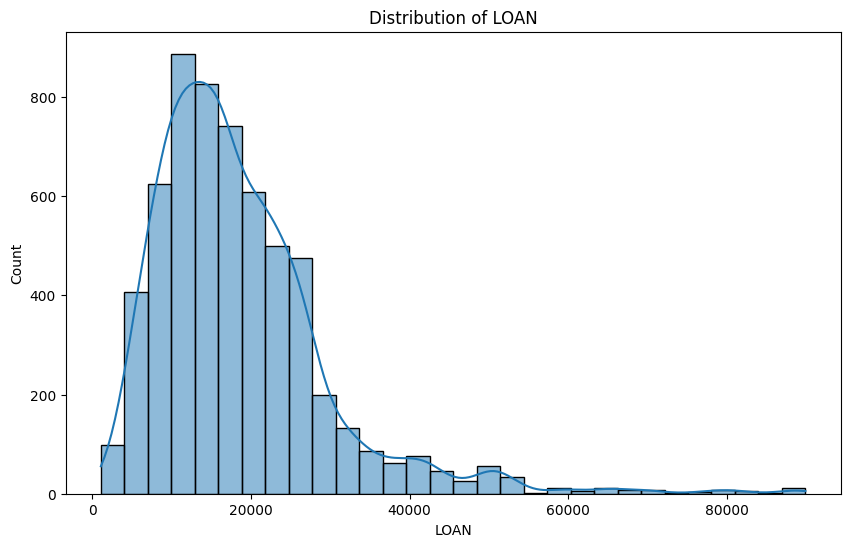

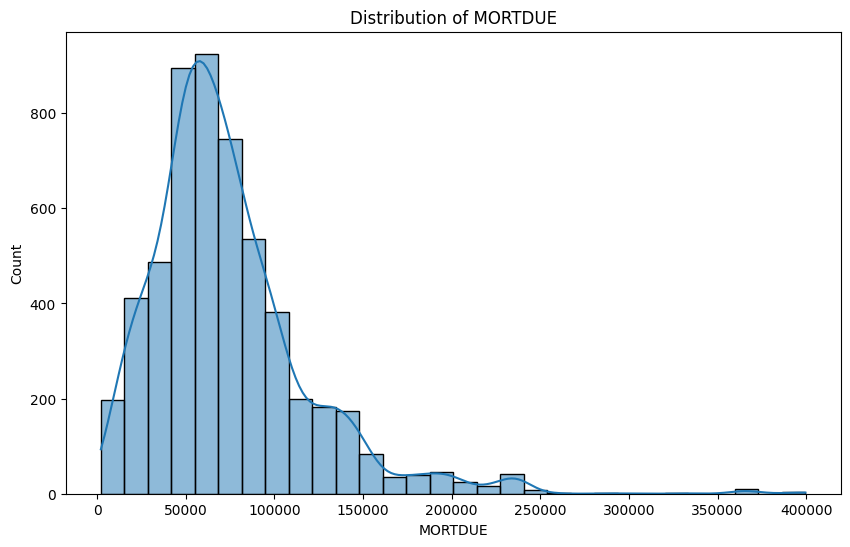

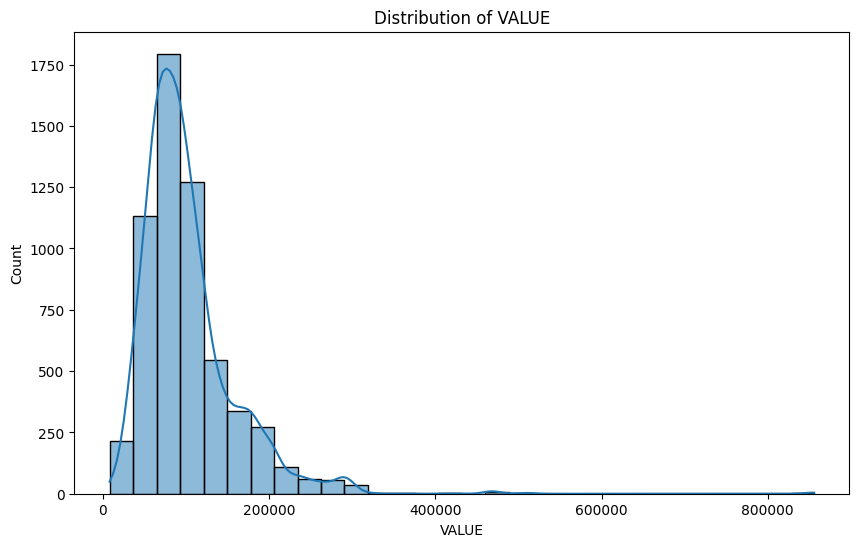

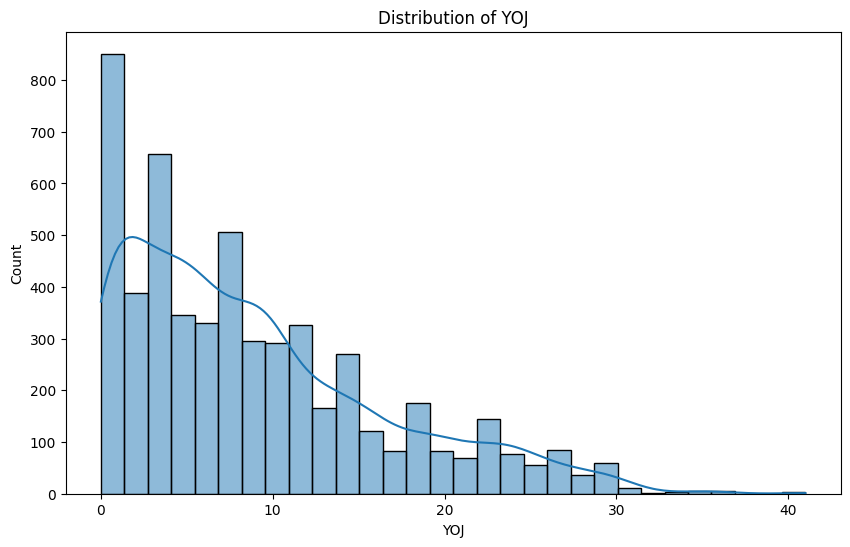

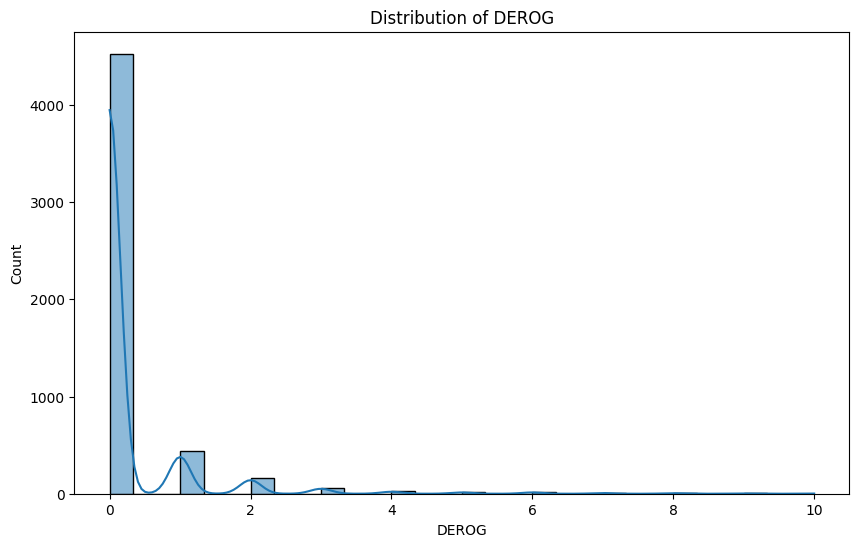

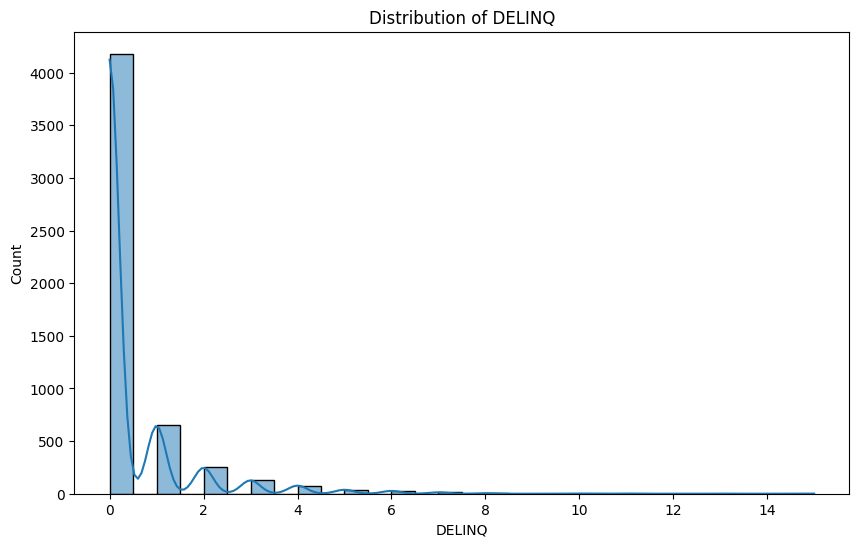

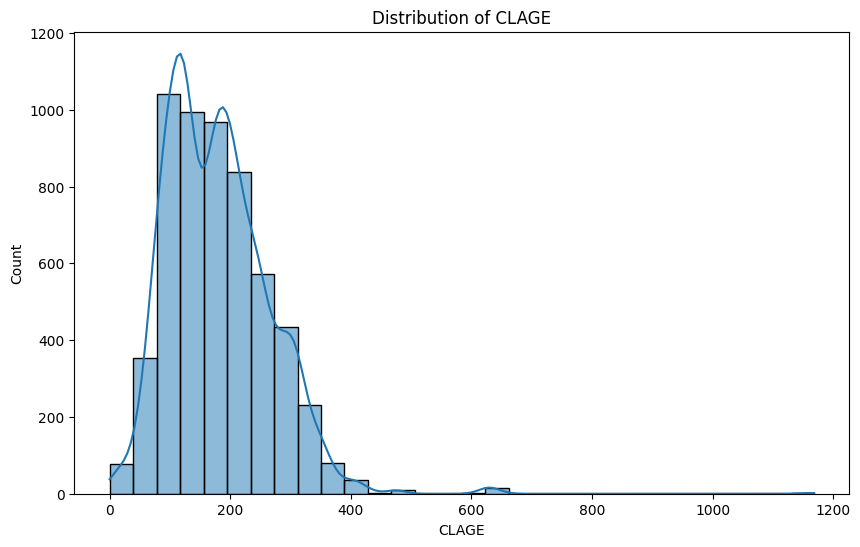

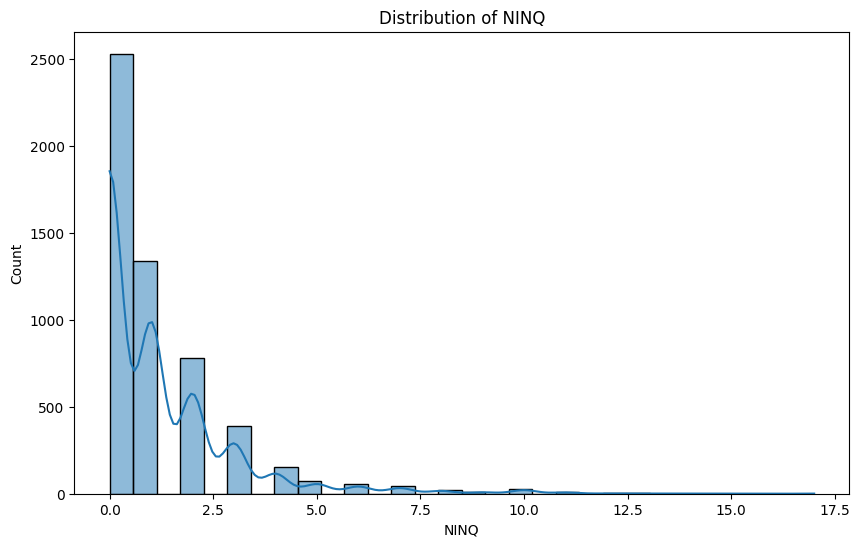

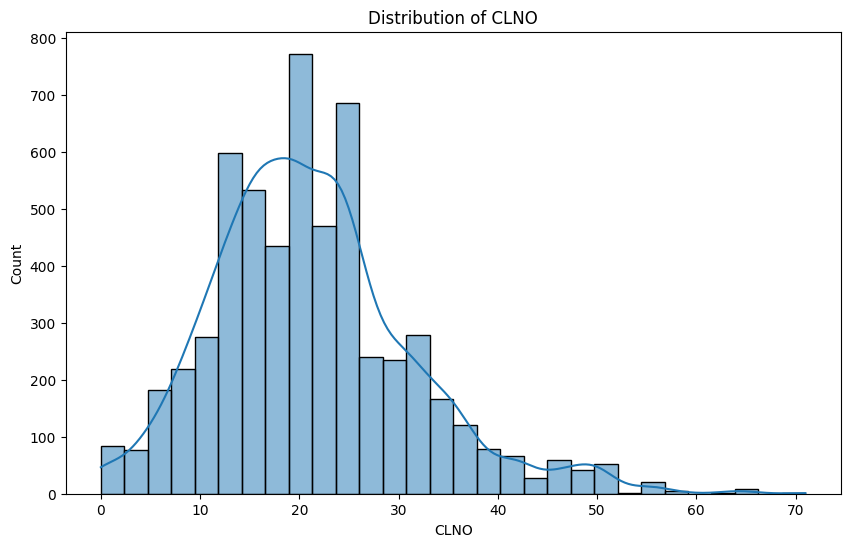

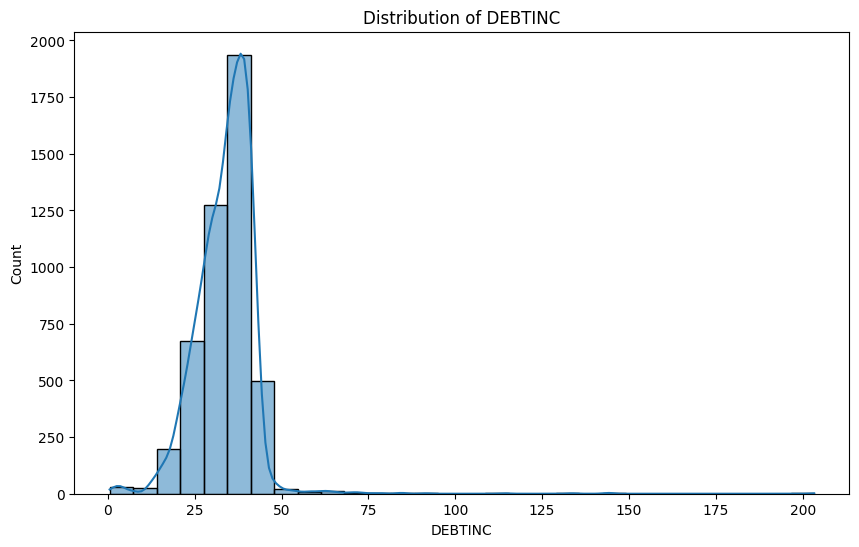

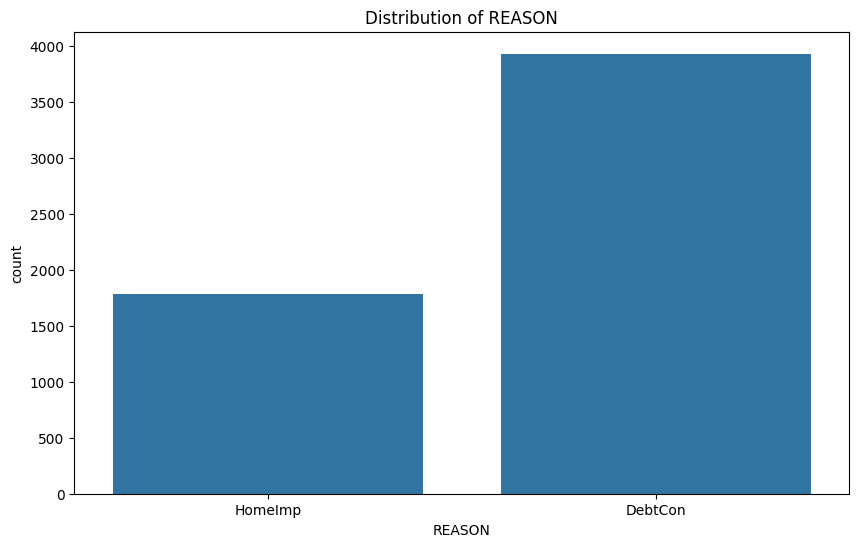

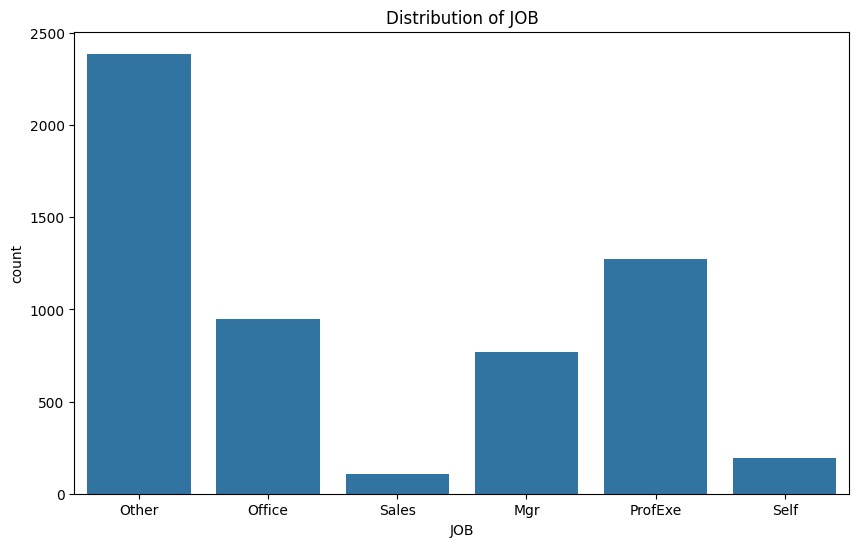

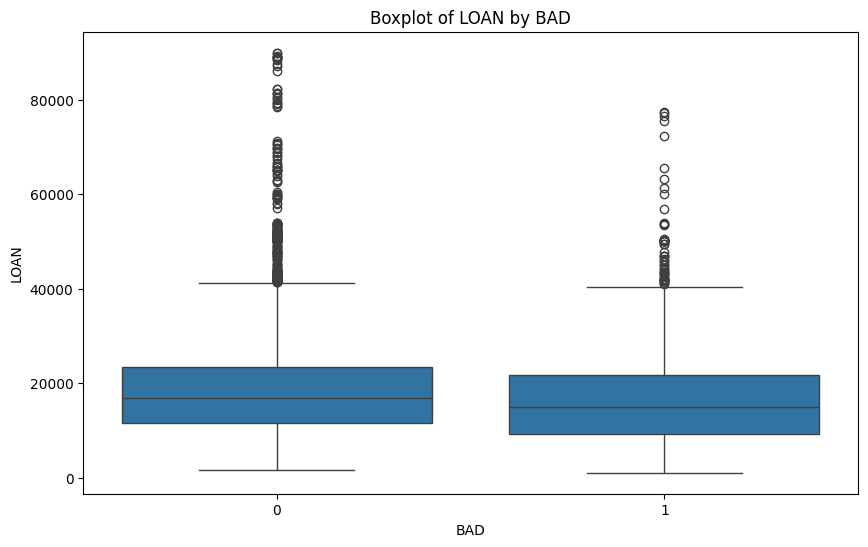

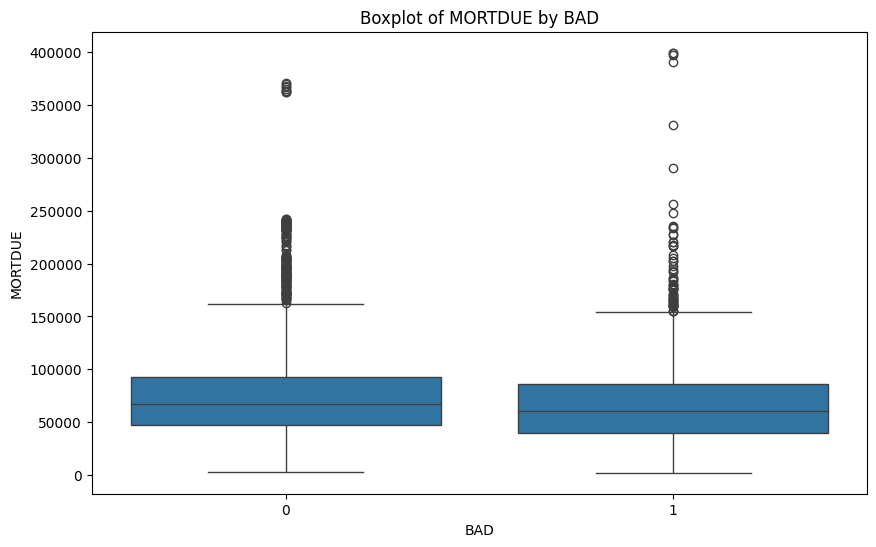

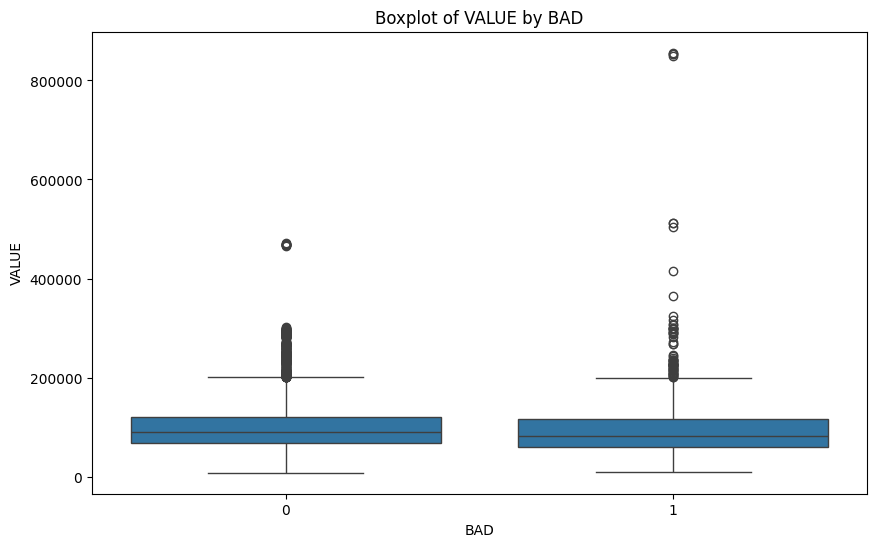

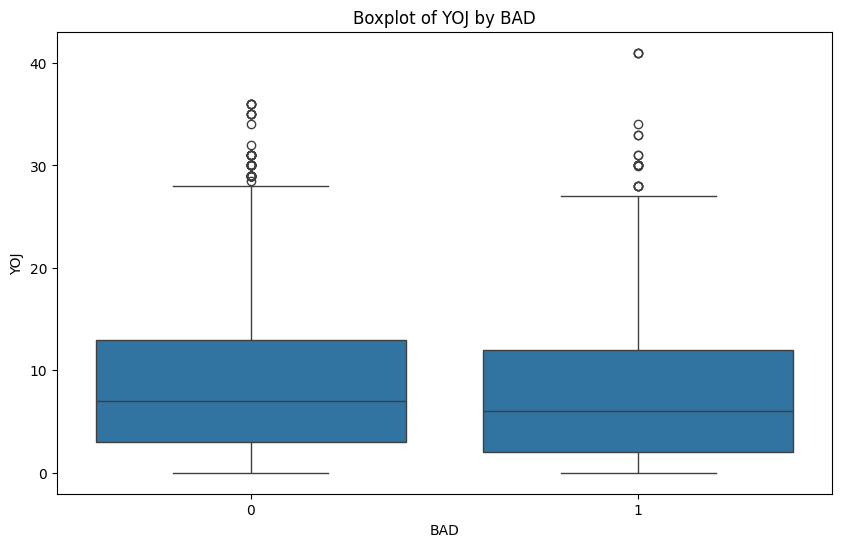

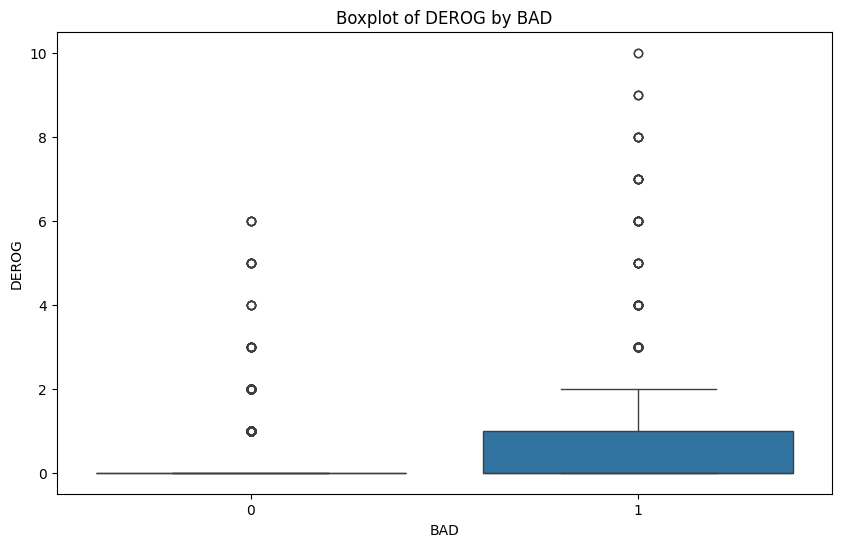

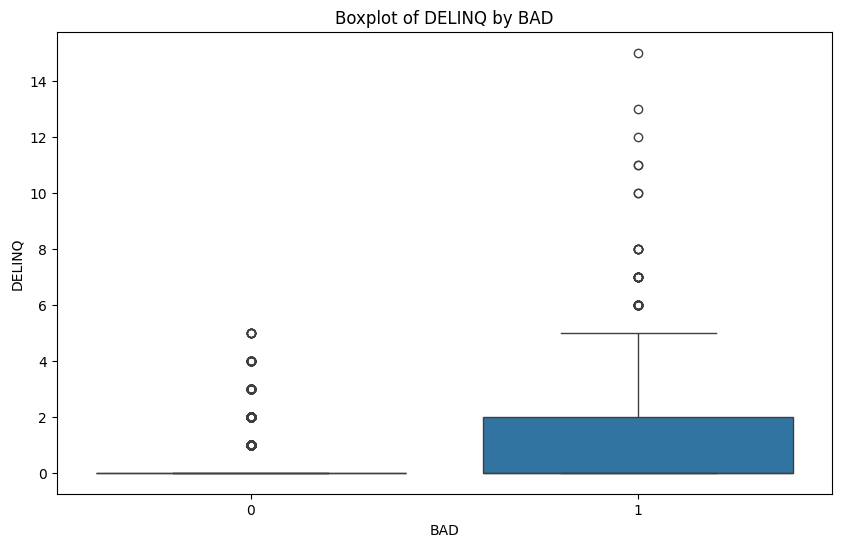

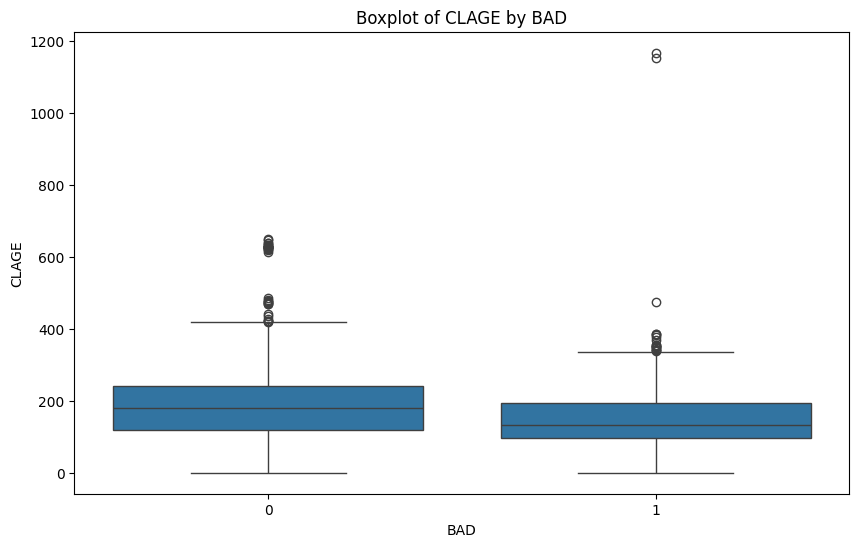

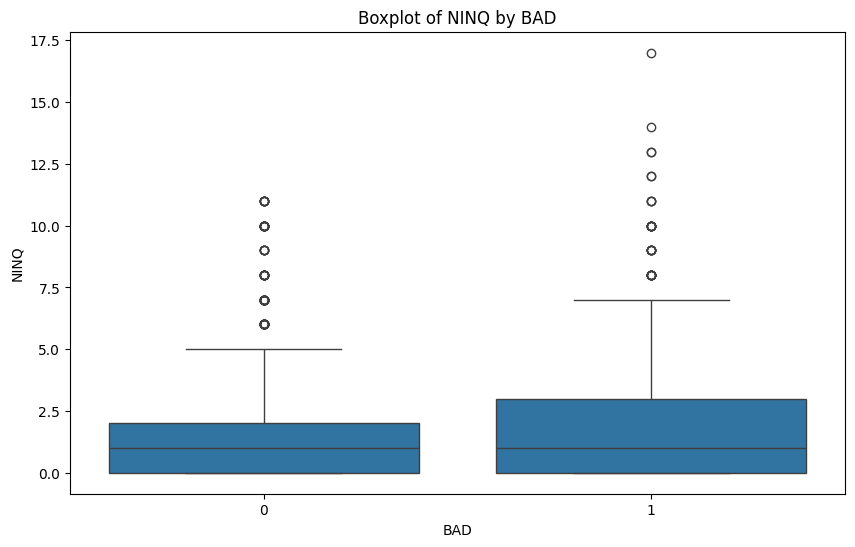

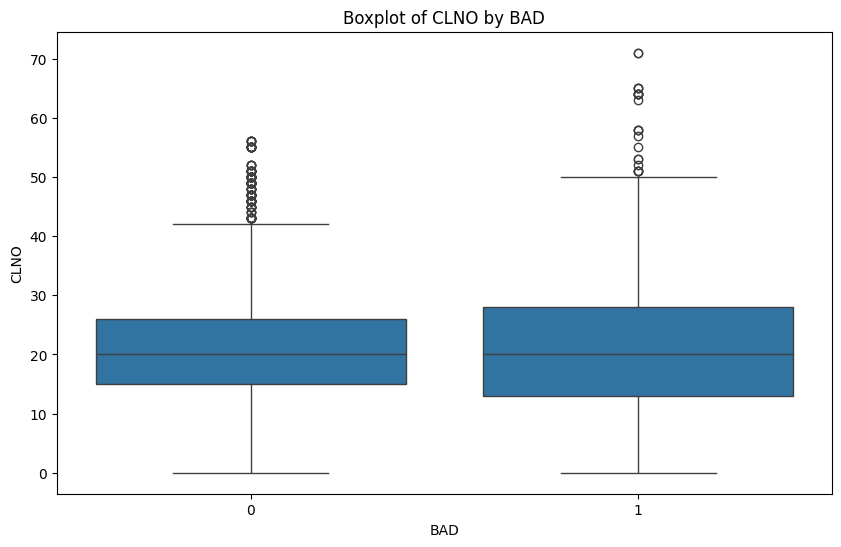

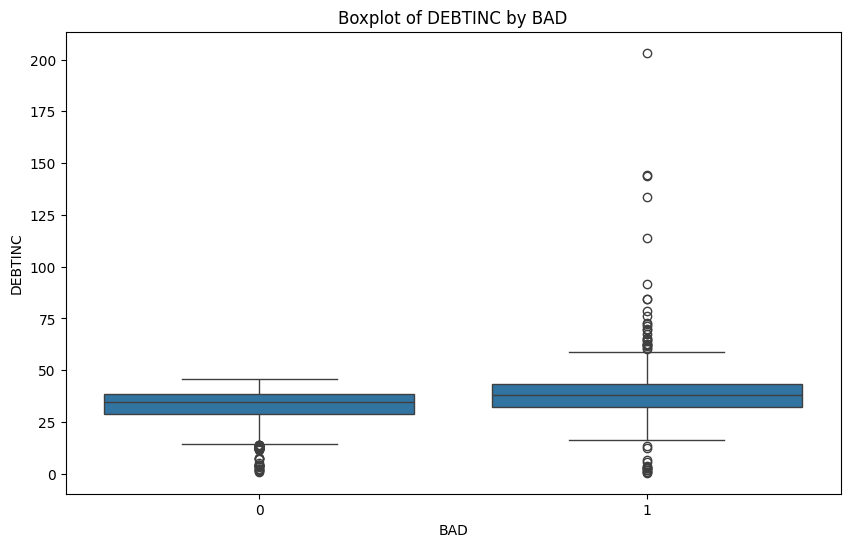

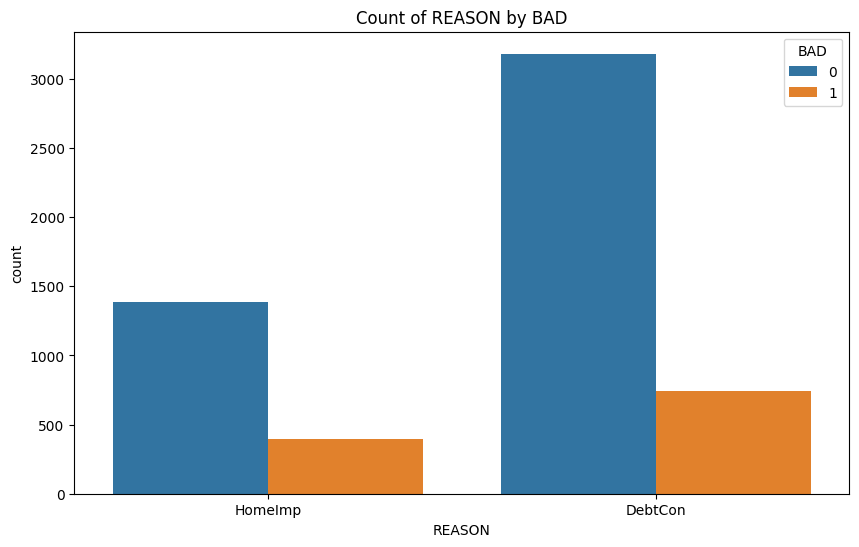

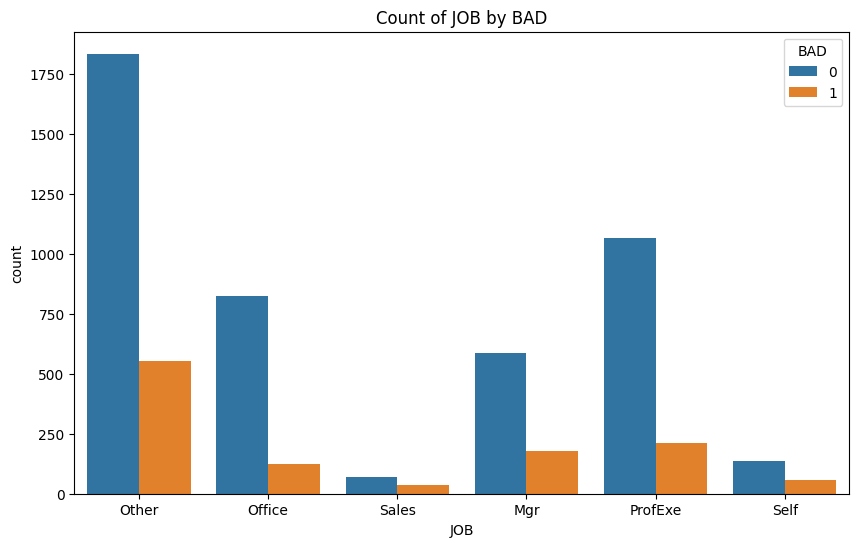

In [16]:
# ChatGPT code goes here:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data from the Excel file
df = pd.read_excel("hmeq.xlsx")

# Preliminary Assessment
print(df.head())

# Descriptive statistics
print("\nNumerical Descriptive Statistics:")
print(df.describe())

print("\nCategorical Descriptive Statistics:")
print(df.describe(include=['object']))

# Visualization: Distribution of Attributes

# List of numerical attributes
numerical_attributes = ['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC']

# Plotting distribution for numerical attributes
for attribute in numerical_attributes:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[attribute], kde=True, bins=30)
    plt.title(f'Distribution of {attribute}')
    plt.show()

# List of categorical attributes
categorical_attributes = ['REASON', 'JOB']

# Plotting distribution for categorical attributes
for attribute in categorical_attributes:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=attribute)
    plt.title(f'Distribution of {attribute}')
    plt.show()

# Association of Attributes with the Target

# For numerical attributes, use boxplots:
for attribute in numerical_attributes:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='BAD', y=attribute, data=df)
    plt.title(f'Boxplot of {attribute} by BAD')
    plt.show()

# For categorical attributes, use countplots:
for attribute in categorical_attributes:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=attribute, hue='BAD')
    plt.title(f'Count of {attribute} by BAD')
    plt.show()


## Prompt 2: Missing Values
Submit the following prompt to ChatGPT. Please make sure to do so in the same session. This will ensure that ChatGPT keeps a memory of previous tasks and your interactions. Copy the code you receive from ChatGPT into the below code cell and (try to) execute it.
```
You mention missing values. These are indeed a problem in this data set. Please write Python code examine the severety of missing values for each attribute. Next, use a basic strategy to impute missing values in each attribute.
```

In [15]:
# ChatGPT code goes here:

## Prompt 3: Data Transformation
Submit the following prompt to ChatGPT. Please make sure to do so in the same session. This will ensure that ChatGPT keeps a memory of previous tasks and your interactions. Copy the code you receive from ChatGPT into the below code cell and (try to) execute it.
```
I noted that the distribution of some attributes show a strong peak at zero and a long tail with some few values far greater than zero. Can you suggest suitable data transformation that will make those variables more useful in a credit scorcard? Please write a Python function to apply those transformations to a specific attribute. Next use your function to transform the attributes:
DEROG
DELINQ
NINQ
``` 

In [15]:
# ChatGPT code goes here:

## Prompt 4: Vanilla Machine Learning Workflow
Submit the following prompt to ChatGPT. Please make sure to do so in the same session. This will ensure that ChatGPT keeps a memory of previous tasks and your interactions. Copy the code you receive from ChatGPT into the below code cell and (try to) execute it.

```
Thanks for your help. I think the data is ready for training a machine learning model. Recall we aim to predict the target BAD from the attributes. Please write Python code for a vanilla machine learning workflow to do this. Make sure your code comprises the development of a predictive model and its evaluation.
```

In [15]:
# ChatGPT code goes here: